# Model-agnostic methods
## Model-agnostic: Partial Dependency Plot (PDP)
### One dimensional Partial Dependance Plot
The partial dependence plot shows the marginal effect of a feature on the predicted outcome of a previously fit model.

Loading libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('day.csv')
df.head(n=2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


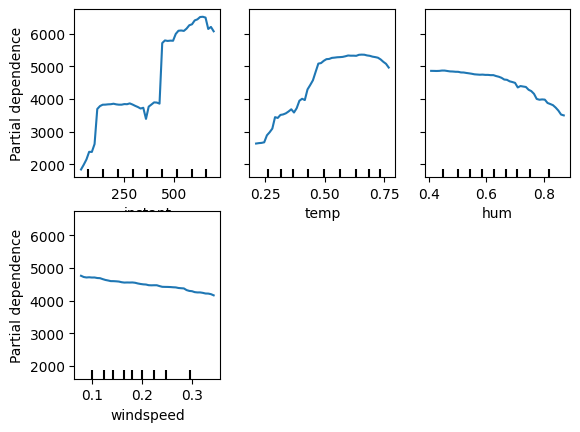

In [10]:
features = ['instant', 'temp', 'hum', 'windspeed']
target = 'cnt'

X = df[features]
y = df[target]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=['instant', 'temp', 'hum', 'windspeed'],
    kind='average',
    grid_resolution=50
)
plt.show()


The influence of days since 2011, temperature, humidity and wind speed on the predicted bike counts.

days_since_2011 (instant)
The PDP show a steady upwards trend over time. This reflects a bike uasage increased over the years. As time progresses, bike rentals increase.

temperature
The plot shows a rise in bike counts as tempreature increases up to a point (e.g. around 25-30 C) then slightly declines at high temeratures. People tend to bike more when it's warm but not too hot.

humidity
PDP shows decline in rentals as humidity increases. High humidity likely discourages outdoor activity. Negative influence - higher humidity reduces bike rentals.

windspeed
As wind speed increases, predicted bike counts decline. Wind create resistence and discomfort for cyclists.
